# Market Data Analysis for Targeted Ads Recommendation

An e-learning company that offers courses on programming wants to promote their product. They would like to invest some money in advertisement. The goal of this project is to find out the two best markets to advertise the product in.

**Possible Data Sources**

1. **Surveys**: Data for this analysis could be generated by organizing surveys for a couple of different markets to find out which would the best choices for advertising. However this is often very costly and time-consuming.

2. **Existing Data**: An alternative to designing surveys from scratch is searching for existing data that may be useful for this analysis. 

This project will use data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of this analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).


## Imports

In [1]:
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
AXIS_FONT_SIZE = 14
TITLE_FONT_SIZE = 17
TITLE_PADDING = 1.07
TICK_FONT_SIZE = 11
plt.style.use('fivethirtyeight')

## Exploring the Data

This analysis will answer questions about a population of new coders that are interested in the product offered:

- Where are the new coders located?
- What are the locations with greatest number of new coders?
- How much money are new coders willing to spend on learning?

In [3]:
survey = pd.read_csv('data/2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [4]:
# Prevent Truncated Output
pd.options.display.max_columns = 150  
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Inspecting Sample Representativeness

In [5]:
survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                       11.770595
  Front-End Web Developer                                                                                                                                                       6.435927
  Data Scientist                                                                                                                                                                2.173913
Back-End Web Developer                                                                                                                                                          2.030892
  Mobile Developer                                                                                                                                                              1.673341
                                                                           

The information in the table above is quite granular, but from a quick scan it looks like:

- A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
- A few people are interested in mobile development.
- A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests.

In [6]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = survey['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

This frequency table confirms the initial observation that many users are interested in multiple roles. Only 32% are interested in only one role.

Users interested in Web/Mobile Development are identified below. This will prove whether this sample is representative (sample largely includes users interested in Web and Mobile Development).

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


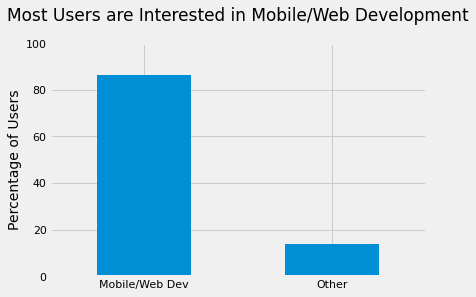

In [7]:
web_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize=True)*100
print(freq_table)

# Plot Frequecny Table
freq_table.plot.bar()
plt.title('Most Users are Interested in Mobile/Web Development', y=TITLE_PADDING, fontsize=TITLE_FONT_SIZE)
plt.ylabel('Percentage of Users', fontsize=AXIS_FONT_SIZE)
plt.xticks([0,1], ('Mobile/Web Dev', 'Other'), rotation=0, fontsize=TICK_FONT_SIZE)
plt.yticks(fontsize=TICK_FONT_SIZE)
plt.ylim([0,100])
plt.show()

Approximately 86% of users are interested in either web or mobile development. These figures offer enough evidence to show that **this sample is representative for the population of interest**. Although there are several products for users with all types of interests, the main products are offered are web and mobile development.


## Find Location of New Coders

This section will analyze the `CountryLive` column in order to answer the following questions:

- Where are the new coders located?
- What are the locations with greatest number of new coders?

The data set provides information at a country level hence each country can be treated as an individual market. This allows the goal to be re-framed as finding the two best countries to advertise in.

One indicator of a good market is the **number of potential customers** — the more potential customers in a market, the better. 

In [8]:
# Drop rows that have null 'JobRoleInterest' values to ensure data is representative.
jobs = survey[survey['JobRoleInterest'].notnull()].copy()
absoult_freq = jobs['CountryLive'].value_counts()
relative_freq = jobs['CountryLive'].value_counts(normalize=True)*100
country_freq = pd.DataFrame({
    'absolut_frequency' : absoult_freq,
    'relative_frequency' : relative_freq
})

country_freq.head(20)

,absolut_frequency,relative_frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


From this frequency table, we can see that 45.7% of potential customers are located in the US, signaling that the US is the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information; however, in depth analysis is needed to show how much money people are actually willing to spend on learning. This is key because advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable. 

## Find New Coder Willing to Spend Money for Learning

This section will analyze the `MoneyForLearning` column which describes (in USD) the amount of money spent by participants from the moment they started coding until the moment they completed the survey.

The analysis will now be narrowed down to include only the top countries that have been identified because:

- These countries have the highest absolute frequencies in the sample, which lends a good amount of data for each.
- Products are offered in English, and English is an official language in all these four countries. The more people that know English, the better the chances to target the right people with ads.

This section will answer the following question:

- How much money are new coders willing to spend on learning?



In [9]:
jobs['MonthsProgramming'].unique()

array([  6.,   5.,  24.,  12.,  18.,   1.,  nan,   9.,  14.,  28.,   3.,
         2.,  25.,   8.,  32.,  60.,  19.,  36.,  30.,  48.,  10.,  15.,
        40.,  20.,   4.,   0.,  16.,  26.,  13.,  11.,  29.,  72.,  50.,
         7.,  17.,  54.,  84., 240.,  42.,  34.,  55.,  59.,  51., 200.,
        70.,  44.,  49., 105.,  80.,  45., 744.,  21.,  96.,  46.,  31.,
        22., 108.,  23.,  39., 120.,  43.,  35.,  33.,  52.,  75.,  41.,
        27., 180., 100., 360., 113., 124., 370.,  86., 144.,  73.,  83.,
       190.,  56.,  38.,  37.,  69., 156., 171., 198., 264.,  58., 480.,
       111., 408., 300.,  89.])

One issue with the `MonthsProgramming` column is that some 0 months. This may mean that they just started learning. 0 will be replaced with 1 to prevent a division by zero error. 

In [10]:
# Create new column to calculate $/month
jobs = jobs[jobs['MonthsProgramming'].notnull()].copy()
jobs['MonthsProgramming'].replace(0,1, inplace = True)
jobs['money_per_month'] = jobs['MoneyForLearning'] / jobs['MonthsProgramming']
jobs = jobs[jobs['money_per_month'].notnull()]

In [11]:
# Group countries by money spent per month
means_money = jobs.groupby('CountryLive').mean()['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
means_money

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

Values for Canada and UK seem low relative to India and US. Considering the GDP of UK and Canada, this is surprising. 

The sample may not be representative for the UK, Canada and India or there may outliers affecting the mean. This will be investigated with a boxplot.

### Investigate Outliers

In [12]:
def box_plot_top4(x, y, data):
    """
    Create box plot for top four countries.
    
    Arguments:
    ----------
    x (string): name of column with categories (countries).
    y (string): name of column with mpney spent.
    data (dataframe): data to plot.
    """
    sns.boxplot(x = x, y = y, data = data)
    plt.ylabel('USD per Month', fontsize=AXIS_FONT_SIZE)
    plt.xlabel('Country', fontsize=AXIS_FONT_SIZE)
    plt.xticks(np.arange(4), ('US', 'UK', 'India', 'Canada'), fontsize=TICK_FONT_SIZE)
    plt.yticks(fontsize=TICK_FONT_SIZE)
    plt.title('USD Spent per Month per Country', y=TITLE_PADDING, fontsize = TITLE_FONT_SIZE)
    plt.show()

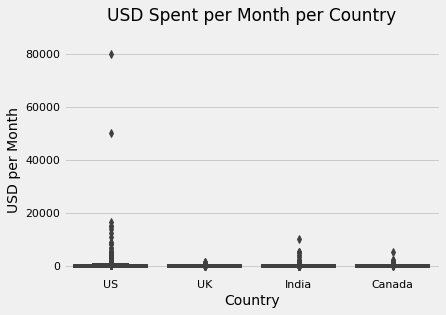

In [13]:
top_four = jobs[jobs['CountryLive'].isin([
    'United States of America',
    'India',
    'United Kingdom',
    'Canada'
])]

box_plot_top4(x = 'CountryLive', y = 'money_per_month', data = top_four)

Box plot for US shows that users spend more than 50,000USD per month to learn. This seems outrageous and is most likely an outlier. Plot shows that most users spend at 20,000USD a month. This will be the cutoff point for outliers.

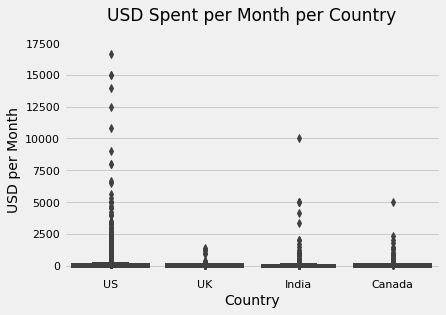

In [14]:
top_four = top_four[top_four['money_per_month'] < 20000]
box_plot_top4(x = 'CountryLive', y = 'money_per_month', data = top_four)

#### Canada Outliers

There seems to be one value (> 4,000USD) that is extremely high relative to the other values for Canada. 

In [15]:
canada_outliers = top_four[(top_four['CountryLive'] == 'Canada') & (top_four['money_per_month'] > 4000)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This user attended one bootcamp and had been coding for 2 months at the time of filling this survey. It is very likely that they spent big on a course mean to last for several months. This means the money spent per month is not realistic. This user can be removed because they probably did not spend any more money in the preceding months after the survey.

In [16]:
top_four = top_four.drop(canada_outliers.index)

#### India Outliers

The box plot for India shows that some users spent a little over 2,000USD. This seems large and unrealistic relative to the majority of the users located in India.

In [17]:
india_outliers = top_four[
    (top_four['CountryLive'] == 'India') &
    (top_four['money_per_month'] >= 3000)
]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

None of the users attended a bootcamp. This makes the large values for USD per month even more unlikely. Perhaps the users answered the questions wrongly. For this analysis, these users will be treated as outliers. 

In [18]:
top_four = top_four.drop(india_outliers.index)

#### US Outliers

The boxplot shows possible outliers for USD greater thatn 6,000.                      

In [19]:
usa_outliers = top_four[
    (top_four['CountryLive'] == 'United States of America') &
    (top_four['money_per_month'] >= 6000)
]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Out of 11 users, only 8 attended a bootcamp. It's impossible to definitively state whether the monthly USD for the other 4 users is legitimate. However, for this analysis they will be treated as outliers.

Furthermore, some users had been programming for less than 3 months at the time of completing this survey. For this analysis they will be treated as outliers for the same reason as the outliers for Canada.

In [20]:
# Remove US outliers who did not attend a bootcamp
usa_no_bootcamp = top_four[
    (top_four['CountryLive'] == 'United States of America') &
    (top_four['money_per_month'] >= 6000) &
    (top_four['AttendedBootcamp'] == 0)
]
top_four = top_four.drop(usa_no_bootcamp.index)

# Remove US outliers who programmed for 3 months or less
usa_no_bootcamp = top_four[
    (top_four['CountryLive'] == 'United States of America') &
    (top_four['money_per_month'] >= 6000) &
    (top_four['MonthsProgramming'] <= 3)
]
top_four = top_four.drop(usa_no_bootcamp.index)

Analyze updated data after outlier treatment.

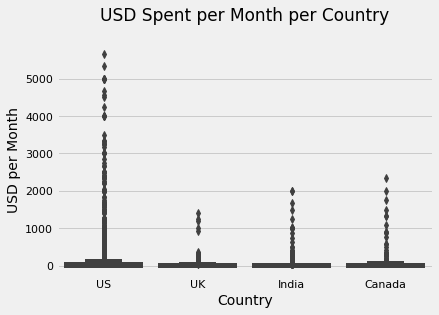

In [21]:
box_plot_top4(x = 'CountryLive', y = 'money_per_month', data = top_four)

Stop outlier investigation here because:

- There's enough evidence to show that US is the best market to advertise in.
- Although a case can be made for possible outliers >= 1,000USD for UK, India and Canada seem to be the next best countries to advertise in. It would not make any difference to deal with those possible outliers in UK.

In [22]:
# Group countries by money spent per month
usd_per_month = top_four.groupby('CountryLive').mean()['money_per_month'].sort_values(ascending=False)
usd_per_month

CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: money_per_month, dtype: float64

At the monthly subscription of 59USD, the data shows that US, Canada and India are the best three countries to advertise in. This because users located within these countries are willing to pay at least 7 more dollars and most 84 dollars more than the monthly subscription rate.

This ranking conflicts with the previous ranking showing the locations where new coders live.

In [23]:
countries = top_four['CountryLive'].value_counts(normalize=True)*100
countries

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

## Summary Dashboard

#### Potential Customer in Top 4 Locations
The pie chart below shows the number of potential customers in the top four countries.

US has the largest percentage of new users. India has almost twice as more new users as Canada does. It is unclear which is the second best country to advertise in.

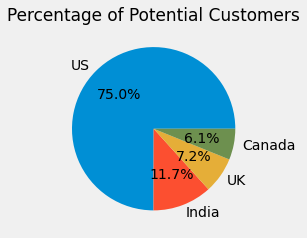

In [24]:
labels = ['US', 'India', 'UK', 'Canada']
countries.plot.pie(figsize = (4,3.5), autopct = '%.1f%%', labels=labels)
plt.ylabel('')
plt.title('Percentage of Potential Customers', fontsize=TITLE_FONT_SIZE)
plt.savefig('customers.png', bbox_inches='tight')
plt.show()

#### Money Spent per Month

The bar chart below shows the amount of money that users are willing to spend per month in the top four countries.

US users spend the most money per month, followed by Canada, India and UK.

In [25]:
def annotate_bars(ax, units, spacing=5):
    """
    Add labels to the end of each bar in a bar chart.

    Arguments:
    ----------
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
                                   of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
        units (string): The units of the values.
    """

    # Annotate Each Bar with its Value
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        label = units + "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            s=label,                      
            xy=(x_value, y_value),         
            xytext=(0, spacing),          
            textcoords="offset points", 
            ha='center',                
            va='bottom')                      

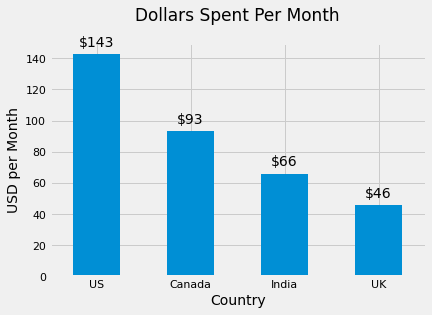

In [26]:
labels = ['US', 'Canada', 'India', 'UK']
ax = usd_per_month.plot.bar()
ax.set_ylabel('USD per Month', fontsize=AXIS_FONT_SIZE)
ax.set_xlabel('Country', fontsize=AXIS_FONT_SIZE)
ax.set_xticklabels(labels, rotation=0)
ax.tick_params(axis='both', which='major', labelsize=TICK_FONT_SIZE, rotation=0)
ax.set_title('Dollars Spent Per Month', y=1.07, fontsize=TITLE_FONT_SIZE)
annotate_bars(ax,units="$")
plt.show()

## Conclusion

Three advertising options can be suggested from analyzing the survey data:

1. Advertise in the US only: this is not ideal because:
    - About 25% of potential customers live are located outside the US.
    - Customers located in Canada and India are willing to spend 159USD per month on learning. 
2. Advertise only in the US and Canada or only in the Us and India: this is not recommended because:
    - Advertising in only either India and or Canada would mean loosing potential customers and revenue from the other country.
3. Advertise in the US, India, and Canada by splitting the advertising budget in various combinations. This is the recommended option because all the advertisement will reach all locations with the highest number of potential customers and users willing to spend the most money per month.

## Future Work
1. Finding another criteria for choosing the best market.
2. Analyzing data from other surveys such as the Stack Overflow Developer Survey